<a href="https://colab.research.google.com/github/talalba/mixed_data_retail/blob/master/main_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import the necessary packages
from sklearn.model_selection import train_test_split
from keras.layers.core import Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import concatenate
import numpy as np
import argparse
import locale
import os
import pandas as pd
import csv
import glob
import os
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from tqdm import tqdm
from skimage.io import imread
from sklearn.model_selection import train_test_split
from pandas import read_excel
import cv2
import pathlib
import multiprocessing
from joblib import Parallel, delayed
num_cores = multiprocessing.cpu_count()
# from models import models
import importlib
import locale
from random import randrange
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
# drive.mount('/content/drive')
import gzip



Using TensorFlow backend.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
directoryPath = '/content/drive/My Drive/'
image_path = '/content/drive/My Drive//Colab Notebooks/images2/'
# ! ls /content/drive/My\ Drive/
data_all = pd.read_pickle(directoryPath+'dbo.data_all3.pkl')
# f = gzip.GzipFile(directoryPath+'data_images.npy.gz', "r")
# data_images = np.load(f)
# train_data_with_images = pd.read_pickle(directoryPath+'dbo.train_data_with_images.pkl')
target_variable = 'CPM'

# train_data = data_all[['Id_x','Impressions','AveragePosition','Sold','Rating',target_variable]]
train_data = data_all[['Id_x',target_variable,'Title','KeyWords']]
train_data = train_data.loc[train_data[target_variable]>0]
train_data = train_data.dropna()



In [302]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [0]:
def clean_text(x):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern, '', x)
    return x
def text_lowercase(text): 
    return text.lower() 

def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '#####', x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}', '##', x)
    return x

def remove_punctuation(text): 
    translator = str.maketrans('', '', string.punctuation) 
    return text.translate(translator) 

def remove_whitespace(text): 
    return  " ".join(text.split()) 

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
  
# remove stopwords function 
def remove_stopwords(text): 
    stop_words = set(stopwords.words("english")) 
    word_tokens = word_tokenize(text) 
    filtered_text = [word for word in word_tokens if word not in stop_words] 
    return filtered_text 

In [297]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

from nltk.corpus import stopwords 
# from nltk.tokenize import word_tokenize 
import nltk
nltk.download('stopwords')
  
stop_words = set(stopwords.words('english')) 
train_data['FilteredTitle'] = train_data['Title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
train_data['FilteredTitle'] = train_data['FilteredTitle'].str.lower()

# docs = train_data['FilteredTitle'].values
# docs = [text_lowercase(text) for text in docs]
# docs = [clean_text(text) for text in docs]
# docs = [remove_whitespace(text) for text in docs]


# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(word_list)
# vocab_size = train_data['FilteredTitle'].nunique()
docs = train_data['FilteredTitle'].to_list()


word_list = [i.split() for i in docs]

norm_corpus = word_list
word2id = t.word_index
word2id['PAD'] = 0

vocab_size = len(word2id)
doc_length = [len(item) for item in encoded_docs]
# plt.hist(doc_length,100)

encoded_docs = [one_hot(d, vocab_size) for d in docs]
type(encoded_docs)
 # pad documents to a max length of 4 words
max_length = np.int(np.ceil(np.mean(doc_length)))
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)
len(padded_docs)
padded_docs.shape
# summarize what was learned
# print(t.word_counts)
# print(t.document_count)
# print(t.word_index)
# print(t.word_docs)
# print(t.word_index)
# encoded_docs = t.texts_to_matrix(train_data['FilteredTitle'], mode='count')

# encoded_docs.shape

split = train_test_split(train_data,padded_docs, test_size=0.2)
(trainAttrX, testAttrX, trainImagesX, testImagesX) = split

maxPrice = trainAttrX[target_variable].max()
maxPrice = 1

trainY = (trainAttrX[target_variable]/ maxPrice).values
testY = (testAttrX[target_variable]/ maxPrice).values

['braun forehead touch thermometer bfh175 new ! free priority mail',
 'duck baby bath thermometer card with new moving line technology',
 '*lcd digital non-contact ir infrared thermometer forehead body temperature*',
 'braun thermoscan 7 irt6520 baby/adult professional digital ear thermometer 4520',
 'digital infrared forehead body thermometer gun non-contact temperature measuring',
 'medical body grade non contact digital infrared temporal forehead thermometer ky',
 "exergen temporal scan forehead artery thermometer tat-2000c ' fast ship from usa",
 'braun no touch forehead thermometer ntf3000 106c -( shipped with priority mail )',
 'express shipping sealed bnib braun forehead thermometer bfh 175 baby adult home',
 'accurate ear forehead infrareddigital thermometer for baby adult temperature gun',
 'ir infrared digital forehead thermometer non-contact baby&adult body thermometer',
 'baby adult non-contact forehead lcd display ir infrared digital thermometer gun',
 'peter rabbit nurser

In [195]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=max_length))
model.add(Flatten())
model.add(Dense(40, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

# compile the model
opt = Adam(lr=1e-1, decay=1e-2/100 )
model.compile(optimizer=opt, loss='mse', metrics=['mae'])
# summarize the model
# print(model.summary())

# fit the model
model.fit(padded_docs, train_data[target_variable].values, epochs=1000,verbose=0)
# evaluate the model
preds = model.predict(padded_docs)
plt.scatter(train_data[target_variable].values,preds.flatten())

# # fit the model
# model.fit(trainImagesX, trainY, epochs=1000,verbose=0)
# # evaluate the model
# preds = model.predict(testImagesX)
# plt.scatter(testY,preds.flatten())

NameError: ignored

In [224]:
embeddings = model.layers[0].get_weights()[0]
embeddings.shape

# words_embeddings = {w:embeddings[idx] for w, idx in t.word_index.items()}
word2id = t.word_index
id2word = {v:k for k, v in word2id.items()}

# from keras import backend as K
# get_3rd_layer_output = K.function([model.layers[0].input],
#                                   [model.layers[3].output])
# layer_output = get_3rd_layer_output([X])[0]

pd.DataFrame(embeddings, index=list(id2word.values())[1:]).head()


(1593, 10)

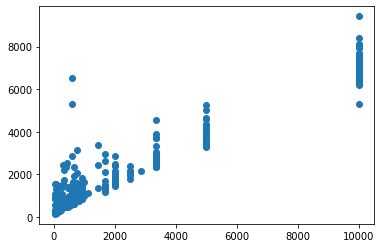

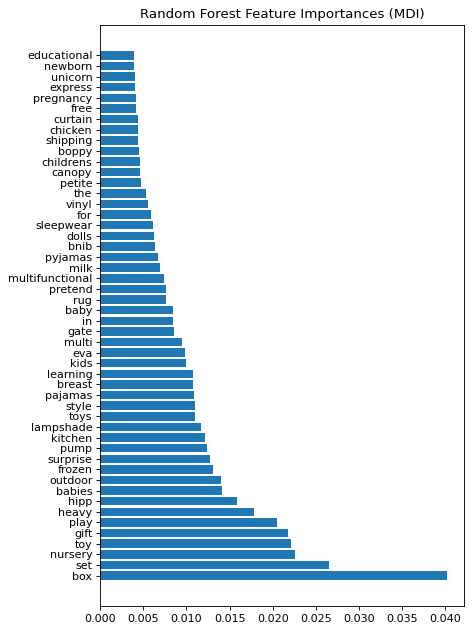

In [305]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor

docs = train_data['FilteredTitle'].values
docs = [clean_text(text) for text in docs]
docs = [remove_whitespace(text) for text in docs]
docs = [clean_numbers(text) for text in docs]
docs = [docs for docs in docs if docs not in stop_words]

vectorizer = TfidfVectorizer()
len(docs)
X = vectorizer.fit_transform(docs)
X.shape
# print(vectorizer.get_feature_names())

rf = RandomForestRegressor(n_estimators=200)
rf.fit(X,train_data[target_variable].values)

pred = rf.predict(X)
plt.scatter(train_data[target_variable].values,pred)

np.array(rf.feature_importances_)


feature_names = np.array(vectorizer.get_feature_names())
type(feature_names)
len(sorted_idx)

n = 50
sorted_idx = rf.feature_importances_.argsort()[::-1][:n]
feature_names[sorted_idx]

y_ticks = np.arange(0, len(feature_names[sorted_idx]))
fig, ax = plt.subplots(figsize=(6, 8), dpi=80)
ax.barh(y_ticks, rf.feature_importances_[rf.feature_importances_.argsort()[::-1][:n]])
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()


# y_ticks = np.arange(0, len(feature_names))
# fig, ax = plt.subplots(figsize=(8, 20), dpi=80)
# ax.barh(y_ticks, rf.feature_importances_[rf.feature_importances_.argsort()])
# ax.set_yticklabels(feature_names[ rf.feature_importances_.argsort()])
# ax.set_yticks(y_ticks)
# ax.set_title("Random Forest Feature Importances (MDI)")
# fig.tight_layout()
# plt.ylabel('ylabel', fontsize=3)

# plt.show()


In [0]:
from gensim.models import doc2vec
def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the complaint narrative.
    """
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(doc2vec.TaggedDocument(v.split(), [label]))
    return labeled

X_train, X_test, y_train, y_test = train_test_split(train_data['FilteredTitle'], np.log(train_data[target_variable].values), random_state=0, test_size=0.01)
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [209]:
from sklearn import utils

model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 306/306 [00:00<00:00, 601432.53it/s]


In [0]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors

In [214]:
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

# reg = LassoCV()
# reg.fit(train_vectors_dbow,y_train)
# print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
# print("Best score using built-in LassoCV: %f" %reg.score(X,y))
# coef = pd.Series(reg.coef_, index = X.columns)
train_vectors_dbow.shape
len(y_train)
lm = LinearRegression().fit(train_vectors_dbow,y_train)
# lasso = linear_model.Lasso(alpha=1)

reg = lm.fit(train_vectors_dbow,y_train)
pred = reg.predict(train_vectors_dbow)
# train_vectors_dm = get_vectors(model_dbow, len(X_train), 300, 'Train')
# test_vectors_dm = get_vectors(model_dbow, len(X_test), 300, 'Test')
# logreg.fit(train_vectors_dm, y_train)
plt.scatter(pred,y_train)



(302, 300)

In [138]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras import optimizers

model = Sequential()
model.add(Dense(15, input_dim=trainImagesX.shape[1], activation="relu"))
model.add(Dense(6, input_dim=trainImagesX.shape[1], activation="relu"))

model.add(Dense(4, activation="relu"))
model.add(Dense(1))

opt = Adam()
# opt = optimizers.SGD(lr=0.01, momentum=0.0, nesterov=False)

model.compile(loss="mean_absolute_error", optimizer=opt)
# train the model
print("[INFO] training model...")
model.fit(trainImagesX, trainY, validation_data=(testImagesX, testY),
	epochs=200, batch_size=8)


array([0.076923, 0.074074, 0.166667, 0.058824, 1.      , 0.333333,
       1.      , 0.066667, 0.166667, 0.333333, 0.2     , 0.034483,
       0.5     , 0.2     , 0.5     , 0.333333, 0.02439 , 0.166667,
       0.012195, 0.018519, 0.0625  , 0.0625  , 0.071429, 0.2     ,
       0.0625  , 0.5     , 0.25    , 0.333333, 0.071429, 0.333333,
       0.010309, 0.5     , 0.071429, 0.066667, 0.083333, 0.0625  ,
       0.066667, 0.016949, 0.066667, 0.333333, 0.008264, 0.25    ,
       0.005128, 0.058824, 0.005102, 1.      , 0.01087 , 0.166667,
       0.5     , 0.058824, 0.2     , 0.05    , 0.021277, 0.032258,
       0.166667, 0.030303, 0.012987, 0.02    , 0.2     , 0.2     ,
       0.012821, 1.      , 0.041667, 0.2     , 0.333333, 0.2     ,
       0.5     , 0.006494, 0.005882, 0.058824, 1.      , 0.285714,
       0.090909, 0.5     , 0.055556, 0.2     , 0.066667, 1.      ,
       0.0625  , 0.090909, 0.045455, 0.021053, 0.5     , 0.008197,
       0.012195, 0.058824, 0.25    , 0.166667, 0.047619, 0.021

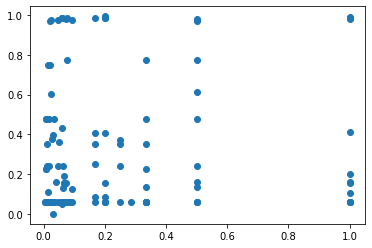

In [0]:
preds = model.predict(testImagesX)
plt.scatter(testY,preds.flatten())


In [0]:
from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators=500, random_state=0)
regressor.fit(trainImagesX,trainY)

y_pred = regressor.predict(testImagesX)
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, y_pred)))
plt.scatter(testY,y_pred)
importances = regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in regressor.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

def getKeysByValues(dictOfElements, listOfValues):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if item[1] in listOfValues:
            listOfKeys.append(item[0])
    return  listOfKeys 

listOfKeys = getKeysByValues(t.word_index, (indices+1) )


t.word_index.values().max()
(indices).max()
print(t.word_index[indices])
dictOfWords = t.word_index
listOfKeys = [key  for (key, value) in dictOfWords.items() if value==39]

# Print the feature ranking
print("Feature ranking:")

for f in range(testImagesX.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(testImagesX.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(testImagesX.shape[1]), indices)
plt.xlim([-1, testImagesX.shape[1]])
plt.show()

175